#### classification 일종 (regression에서 넘어옴)
- 단순한 숫자가 아니라 categorical한 부분 (뭐는 뭐다)

In [1]:
# TensorFlow and tf.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
import tensorflow

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(x_train, y_train),(x_test, y_test) = tensorflow.keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [2]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

11493376/11490434 [==============================] - 2s 0us/step


In [3]:
x_train.shape

(60000, 28, 28)

→ 이미지라는 것은 사실 2차원이지만 여기 밑에 쓰는 pixel도 image 여서 28 * 28 이고 그게 총 60000장이 있는 것

In [4]:
x_train.reshape(60000,784)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

→ 하면 (60000,784)로 데이터 구조 바뀜 => flatten과 연관
- vector로 하면 28 * 28 = 784개의 vector로 바뀜

In [5]:
y_train.shape

(60000,)

#### 세부 값 확인하기 = 데이터 구조 파악하기 (shape)

In [6]:
x_train

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [5]:
x_train[0,:,:]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

x_train 과 y_train을 255 로 나눠주는 것 = test 값

→ 이 작업을 맨 위 명령어에서 x_train, x_test = x_train / 255.0, x_test / 255.0 로 지정해준 것

In [7]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [8]:
y_train[0]

5

In [9]:
y_train[1]

0

In [10]:
y_train[10]

3

In [11]:
x_test.shape

(10000, 28, 28)

train은 아까 60000개였는데 10000개로 규모 줄어듬

In [12]:
y_test.shape

(10000,)

당연히 x_test, y_test 값 개수는 똑같 (data는 pair로 존재)

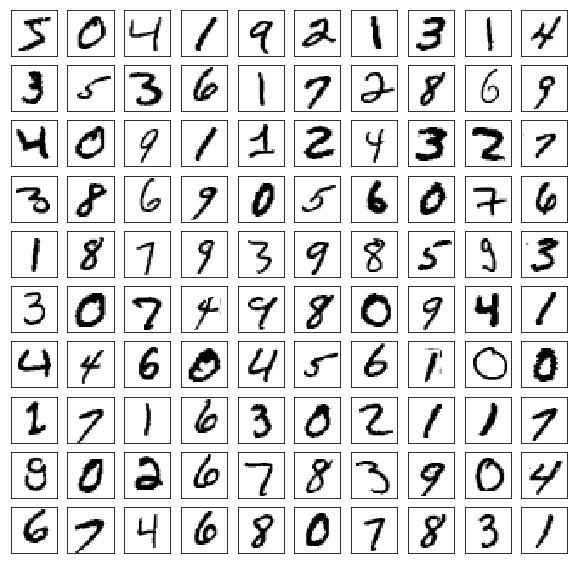

In [13]:
plt.figure(figsize=(10,10))
for i in range(100):
    plt.subplot(10,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap=plt.cm.binary)
plt.show()

figsize= (100, 100)하면 그림 크기가 커져서 결과 보여줌

- 그림 확대하면 사각형 사각형 형태가 보이는데 그거 하나하나가 데이터라고 생각하면 되고 하얀게 0 검은게 1 이라고 생가하면 됨

subplot 잘 이용하기
- in range 해서 몇번의 루프 돌아야 할지 → 총 100개의 이미지를 보여줘야 하니 100번의 루프를 돔
- 그 과정하는데 subplot하기 위해서 10by10 하고 뒤에 i+1하면 됌(index는 0부터 들어가니까)

그 후 xticks, yticks 는 공집합으로 설정

그 다음 imshow라는 함수를 쓰고

cm.binary (cm = color map) = 흑과백의 바이너리
- 이 라인을 빼버리면 배경이 까만색이고 숫자 노란색으로 나와서 흑백이 아니라 컬러처럼 나올 수 있

In [13]:
img_rows = 28
img_cols = 28

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(img_rows, img_cols)),
  tf.keras.layers.Dense(512, input_size=784, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


처음에 sequential만들고 add, add 하는 방식으로 써도 되지만
이런 방식을 써도 됨

dense 가 두개 있다고 보면 됨.
dense 하나 = 레이어 두개 연결해논 거 한개

처음 레이어는 784개 두번째 레이어에 노드는 512 맨마지막은 10

dropout은 weight(화살표) 가지치기하는 역할

히든레이어에는 activatoin 'relu'걸어줘야 결과 잘나옴
맨 마지막에는 'softmax'걸어줌

In [14]:
img_rows = 28
img_cols = 28

model = Sequential()
model.add(Flatten(input_shape=(img_rows, img_cols)))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.


In [15]:
# Take a look at the model summary
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


전 regression에서 짠 코드와 차이점만 확인해 보면

- 이 라인 : tf.keras.layers.Flatten(input_shape=(img_rows, img_cols)),

→Flatten 의 역할 : 벡터가 아닌 2차원의 matirx 값을 넣을 때 쓰는 효과
- image 28* 28 (matrix로 되어있는 값)이 input으로 들어가는데 원래 input은 그냥 몇개로 단순 1차원적으로 들어가기에 이 28* 28을 flatten해주는 작업을 명령하는 것

→ 여기서 input layer 의 노드의 수는 몇개? = 784개= 28 * 28 (neural net에서는 벡터 형태만 처리하기 때문에)
- 첫번째 hidden layer 노드의 수 = 512
- 마지막 layer의 노드의 개수 = 10 개


- 두 번째 다른 라인 : tf.keras.layers.Dropout(0.2),

→ 화살표들 숱치기(잘라버리기) for 결과 효율 performance 높이기 위해서

→ 예) 화살표 총 100개면 0.2(0보다크고 1보다 작은 값)하면 20퍼센트 없애는 것

input_shape=(img_rows, img_cols) → 이거 의미가 28 * 28 임

input_size=784 → 써도 되고 안써도 됨

화살표 선들이 다 weight 이고 숫자들 계산 정확히 이해

늘 그래프 머릿속에 그릴 수 있어야 함(제일 처음에 있는 게 x, 마지막에 있는 게 y)

In [16]:
Adam = tensorflow.keras.optimizers.Adam
model.compile(optimizer = Adam(lr=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [17]:
print(model.input_shape)
print(model.output_shape)

(None, 28, 28)
(None, 10)


In [18]:
x_train.shape

(60000, 28, 28)

In [19]:
y_train.shape

(60000,)

왜 60000 * 10이 안나옴? 
- 사실 y값에는 5 = [0000010000] / 0= [1000000000] 이런식으로 표현되어야 하는데(=one hot coding 방식 - 1을 딱 하나만 주는 것)
- 그냥 5,0,4,1 ...으로 y값을 표현했기 때문에

위에 line "loss='sparse_categorical_crossentropy'"  
- loss에 sparse써주면 저렇게 길게 표현 안해줘도 되고
- sparse 빼면 one hot coding방식으로 표현해줘야 함

overfit (과대적합)
- loss 값이 내려다가다 다시 올라가는
- 일정 에포크 동안 훈련하면 검증 세트에서 모델 성능이 최고점에 도달한 다음 감소
- 학습시에 너무 특수한 경우 데이터들을 포함시켜서 일반화가 떨어지게 되기 때문

underfit (과소적합)
-  테스트 세트의 성능이 향상될 여지가 아직 있을 때 일어남
-  네트워크가 훈련 세트에서 적절한 패턴을 학습하지 못했다는 뜻

In [20]:
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split = 0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 28s 593us/sample - loss: 0.2227 - acc: 0.9344 - val_loss: 0.1190 - val_acc: 0.9656
Epoch 2/10
48000/48000 [==============================] - 25s 517us/sample - loss: 0.0887 - acc: 0.9731 - val_loss: 0.0874 - val_acc: 0.9734
Epoch 3/10
48000/48000 [==============================] - 24s 507us/sample - loss: 0.0559 - acc: 0.9828 - val_loss: 0.0836 - val_acc: 0.9753
Epoch 4/10
48000/48000 [==============================] - 26s 531us/sample - loss: 0.0383 - acc: 0.9882 - val_loss: 0.0808 - val_acc: 0.9762
Epoch 5/10
48000/48000 [==============================] - 25s 519us/sample - loss: 0.0275 - acc: 0.9912 - val_loss: 0.1075 - val_acc: 0.9722
Epoch 6/10
48000/48000 [==============================] - 21s 444us/sample - loss: 0.0222 - acc: 0.9925 - val_loss: 0.0983 - val_acc: 0.9744
Epoch 7/10
48000/48000 [==============================] - 23s 471us/sample - loss: 0.0189 - acc: 0.9941 

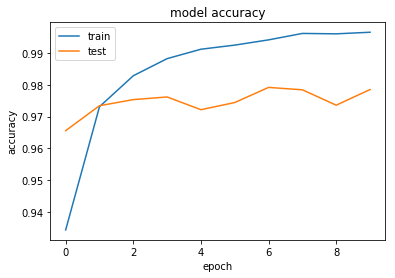

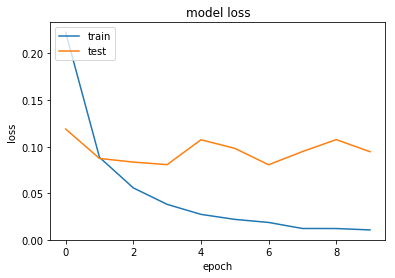

In [21]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [22]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 139us/sample - loss: 0.0848 - acc: 0.9798


[0.08481676751663762, 0.9798]

In [ ]:
len(image)
Out[70]:784

In [ ]:
image_3darray = np.array(image).reshape([1,img_rows,img_cols])
result = model.predict(image_3darray)
plt.bar(list(range(10)), list(result.reshape([10])))

Out[68]:
<BarContainer object of 10 artists>